In [1]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram

**Make a Quantum Circuit for Teleporatation Algorithm**

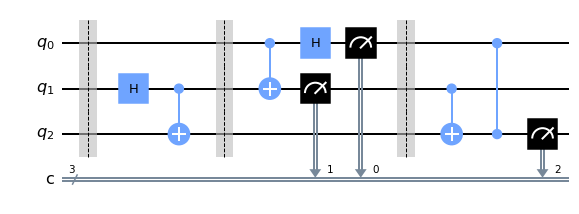

In [7]:
ckt=QuantumCircuit(3,3)
# Q0 is the bit which needs to be teleported . ALice has this qubit
# Q1 => Alice and Q2 => Bob are entangeled bits
ckt.barrier()
# First of all , Alice and Bob share an entangled qubit
ckt.h(1)
ckt.cx(1,2)
ckt.barrier()
# Now Alice Measures her qubits in Bell Basis
ckt.cx(0,1)
ckt.h(0)
ckt.measure([0,1],[0,1])
ckt.barrier()
# After Alice Measures , she sends results to bob over classical channel
# Based on which he applies CX and CZ gates on his qubit 
ckt.cx(1,2)
ckt.cz(0,2)
# Now this q3 = earlier q1
ckt.measure(2,2)
ckt.draw()

**Simulate on Classical Machine**

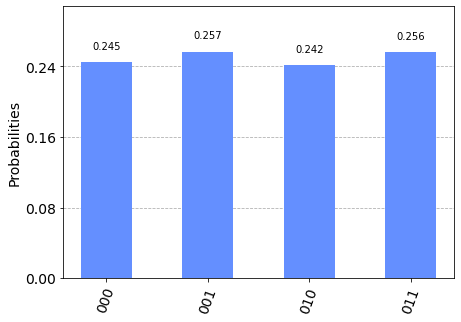

In [6]:
simulator=Aer.get_backend('qasm_simulator')
result=execute(ckt,backend=simulator,shots=1024).result()
counts=result.get_counts()
plot_histogram(counts)

**Simulate on IBM Quantum Machine**

In [6]:
 IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [7]:
provider=IBMQ.get_provider(hub='ibm-q',group='open',project='main')
qcomp=provider.get_backend('ibmq_bogota')
job=execute(ckt,backend=qcomp)
from qiskit.tools.monitor import job_monitor
job_monitor(job)

Job Status: job has successfully run


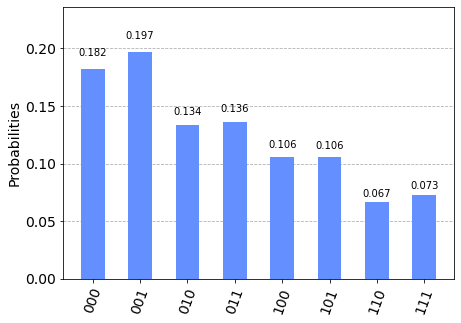

In [8]:
result=job.result()
plot_histogram(result.get_counts(ckt))